In [1]:
from manim import *
import numpy as np
from math import sqrt

In [2]:
scale = 2
step = 1

imgScale = 1

config.background_color = WHITE
config.frame_width = scale * 2
config.pixel_width = round(imgScale * 1920)
config.pixel_height = round(imgScale * 1920)

Manim Community v0.19.0

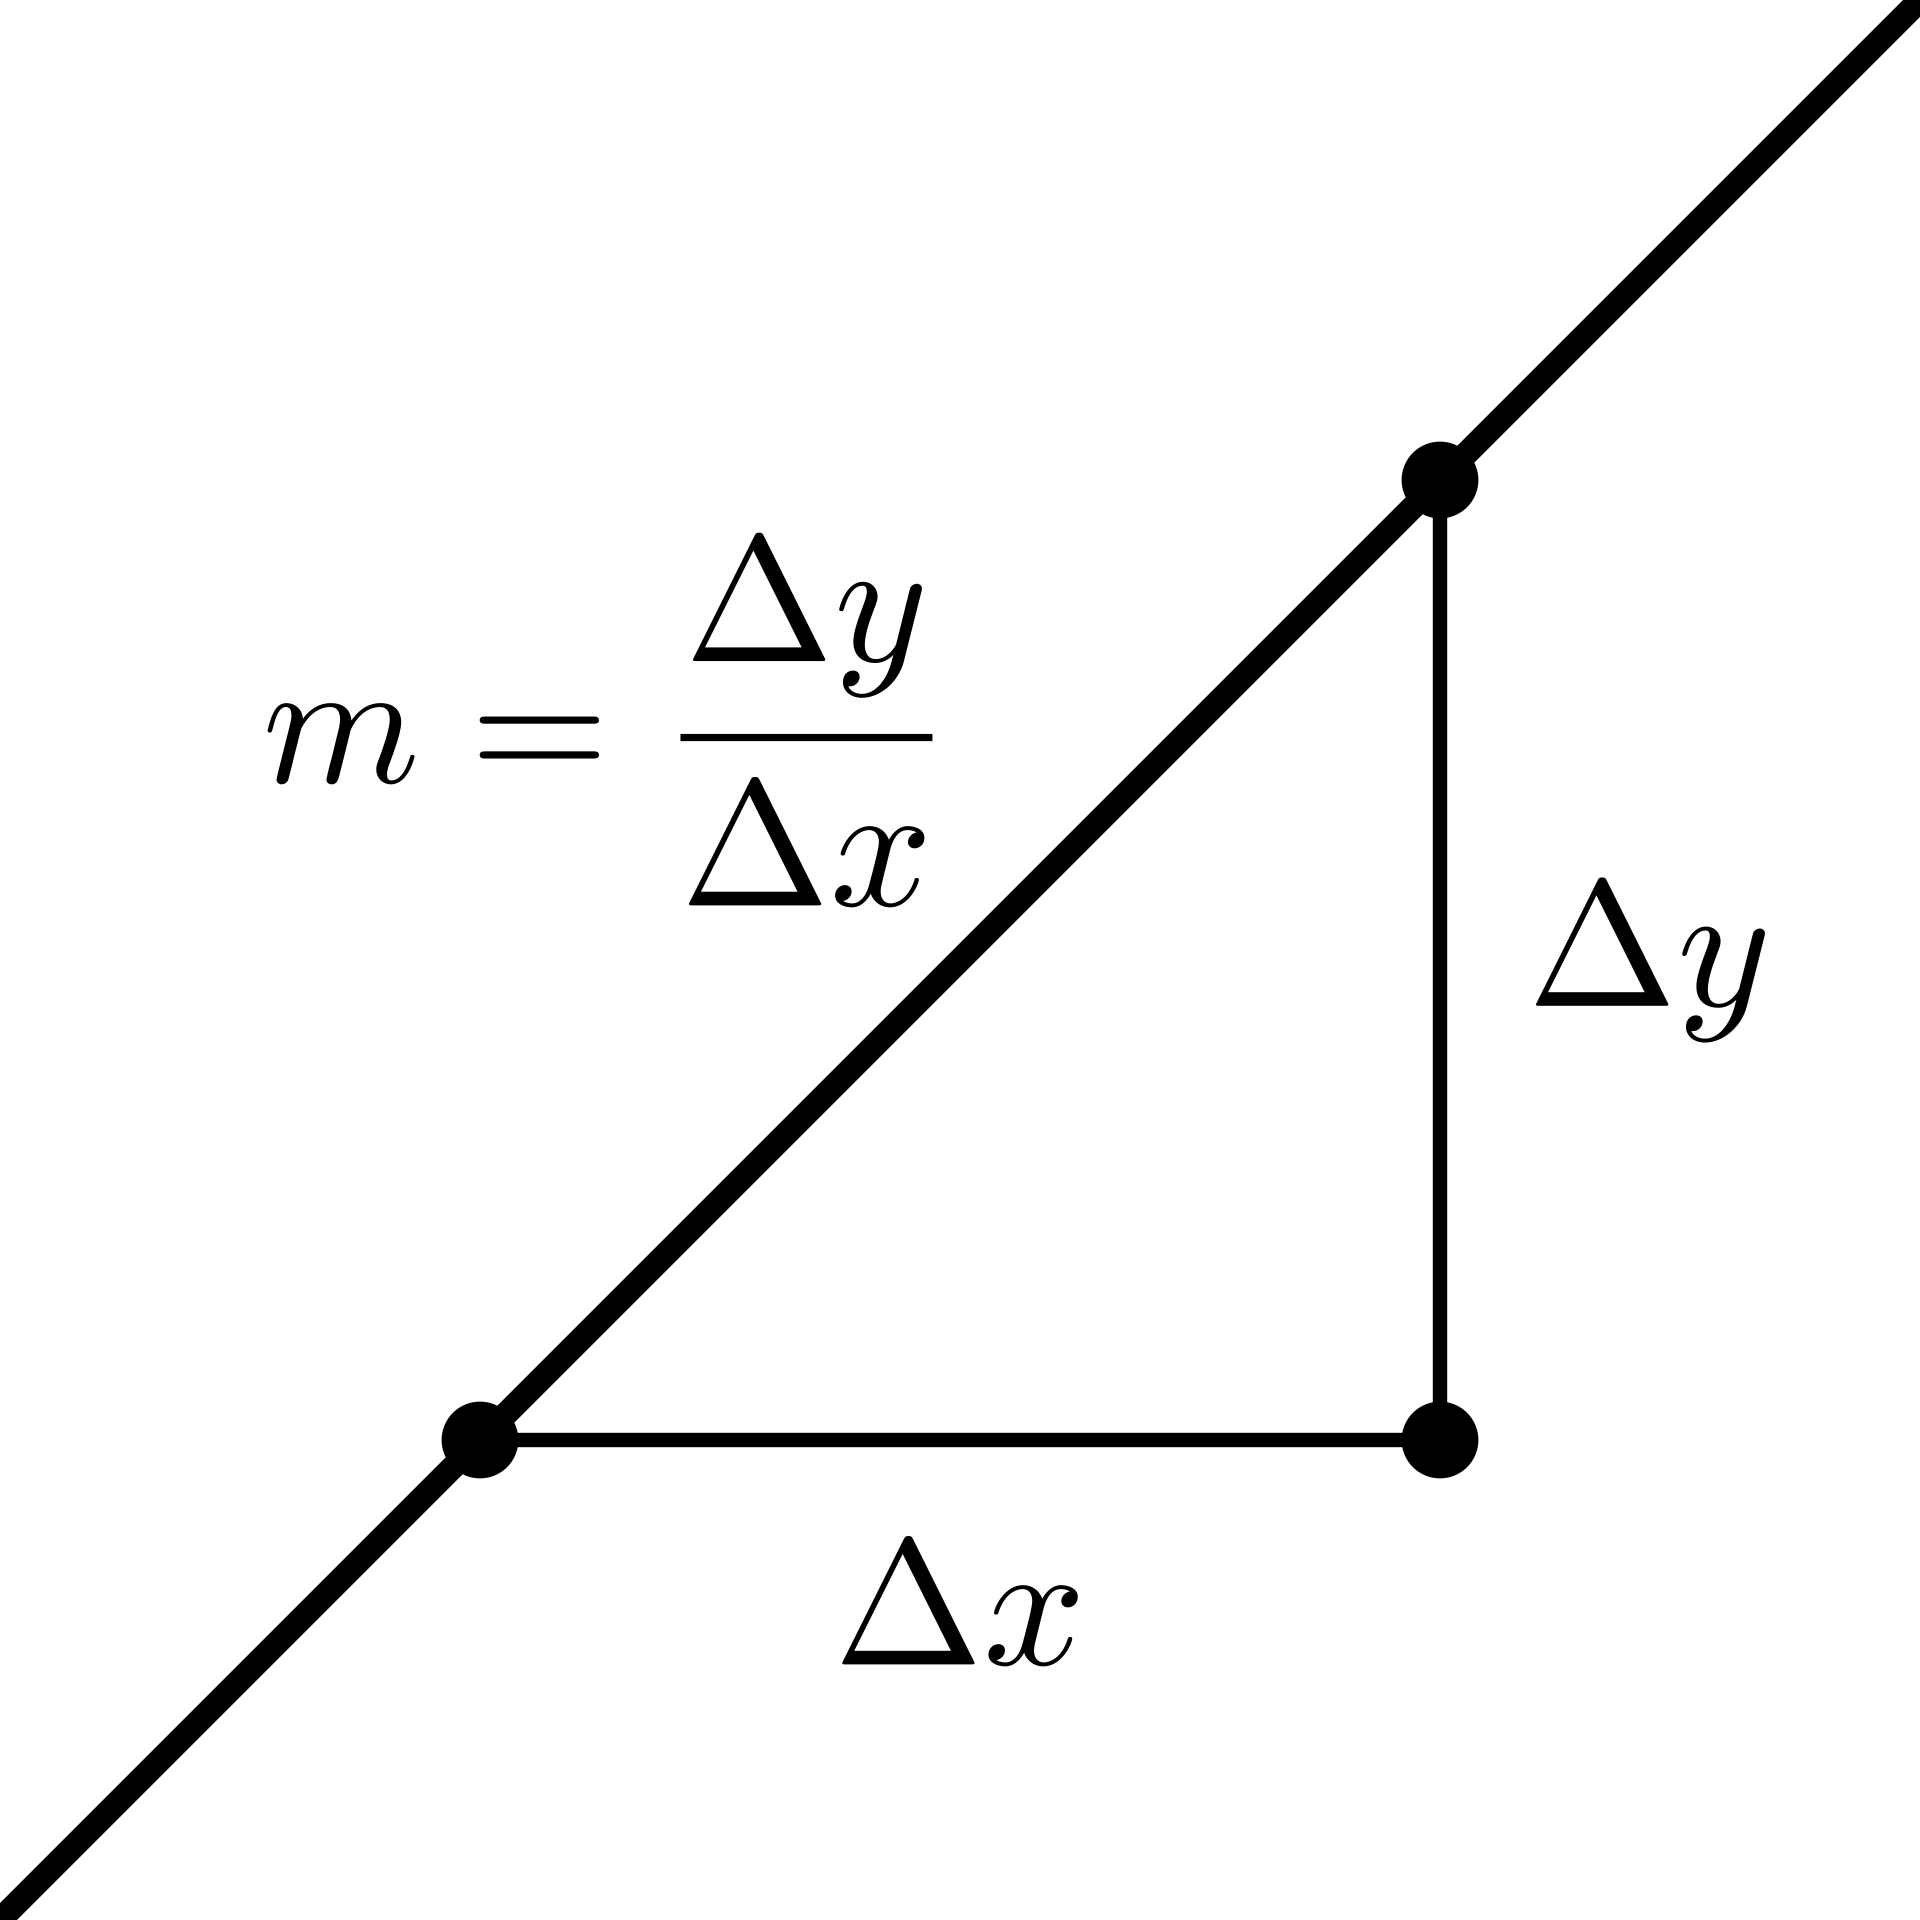

In [3]:
%%manim -v WARNING LinearROT

class LinearROT(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        numberplane = NumberPlane(
            x_range = (-scale, scale, step),
            y_range = (-scale, scale, step),
            # axis_config = {
            #     "color": BLACK, 
            #     "stroke_width": scale
            # }, 
            background_line_style = {
                "stroke_color": WHITE,
                "stroke_width": 2,
                "stroke_opacity": 0.6
            }
            )

        line = FunctionGraph(
            lambda x: x,
            color = BLACK,
        )
        line.stroke_width = 5

        vertical_line = Line(start=(-1, -1, 0), end=(1, -1, 0), color=BLACK, stroke_width=3)
        horizontal_line = Line(start=(1, 1, 0), end=(1, -1, 0), color=BLACK, stroke_width=3)

        diagonal_midpoint = (0, 0, 0)  # Midpoint of the diagonal line
        delta_y_text = MathTex(r"\Delta y", color=BLACK, font_size=36).next_to((1, 0, 0), RIGHT, buff=0.2)
        delta_x_text = MathTex(r"\Delta x", color=BLACK, font_size=36).next_to((0, -1, 0), DOWN, buff=0.2)
        delta_ratio_text = MathTex(r"m = \frac{\Delta y}{\Delta x}", color=BLACK, font_size=36).move_to(diagonal_midpoint + UL * 0.5 + LEFT * .25)



        dot1 = Dot((-1, -1, 0),  radius=0.08, color=BLACK)
        dot2 = Dot((1, 1, 0),  radius=0.08, color=BLACK)
        dot3 = Dot((1, -1, 0),  radius=0.08, color=BLACK)

        self.add(numberplane, line, dot1, dot2, dot3, vertical_line, horizontal_line, delta_y_text, delta_x_text, delta_ratio_text)

Manim Community v0.19.0

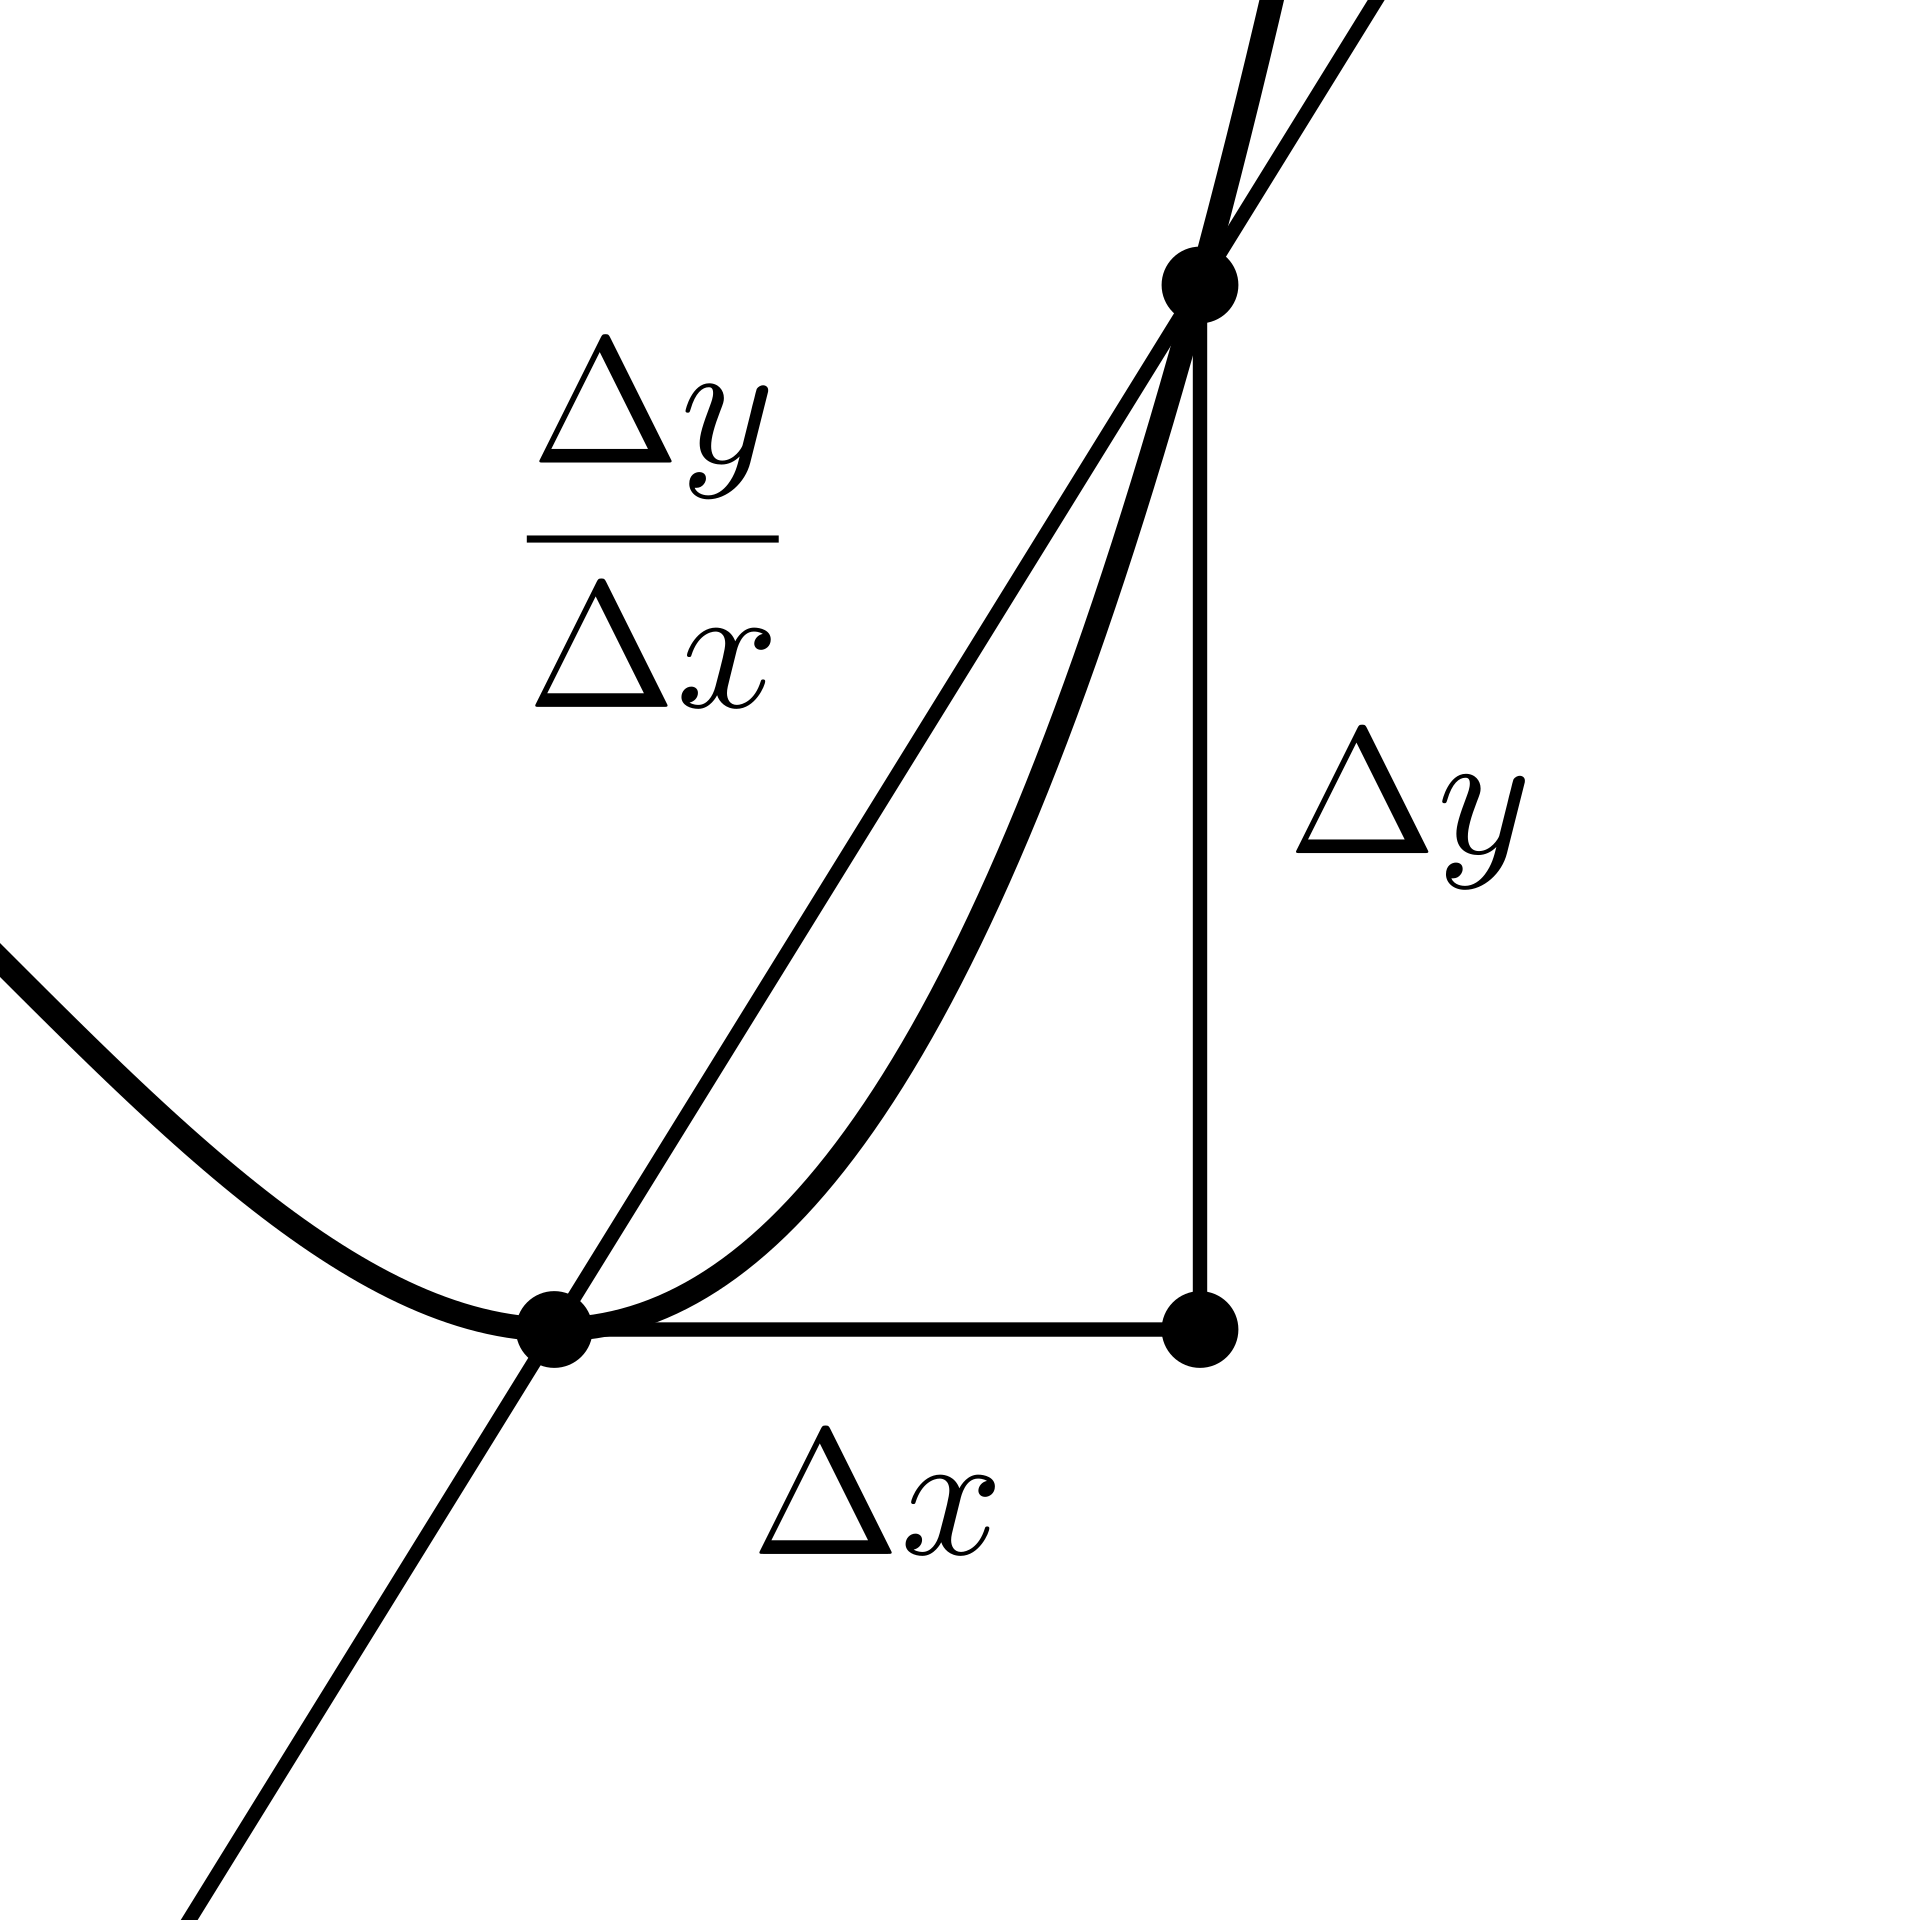

In [4]:
%%manim -v WARNING NonLinearROT

scale = 1
config.frame_width = scale * 2

def poly(x):  
    return x * (x + 1) * (x - 1)

x1 = sqrt(1/3)
x2 = 1.25

slope = (poly(x2) - poly(x1)) / (x2 - x1)
b = poly(x1) - (slope * x1)

def linear_function(x):
    return (slope * x) + b

class NonLinearROT(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        line = FunctionGraph(
            poly,
            color=BLACK,
            x_range=(-scale * 2, scale * 2)  # Explicitly set the range
        )
        line.stroke_width = 2.5

        horizontal_line = Line(start=(x1, poly(x1), 0), end=(x2, poly(x1), 0), color=BLACK, stroke_width=1.5)
        vertical_line = Line(start=(x2, poly(x2), 0), end=(x2, poly(x1), 0), color=BLACK, stroke_width=1.5)

        dot1 = Dot((x1, poly(x1), 0), radius=0.04, color=BLACK)
        dot2 = Dot((x2, poly(x2), 0), radius=0.04, color=BLACK)
        dot3 = Dot((x2, poly(x1), 0), radius=0.04, color=BLACK)

        midx = (x2 + x1)/ 2
        midy = (poly(x2) + poly(x1)) / 2

        midpoint = Dot((midx, midy, 0), radius=0.04, color=BLACK)

        delta_y_text = MathTex(r"\Delta y", color=BLACK, font_size=18).next_to(vertical_line.get_center(), RIGHT * .5, buff=0.2)
        delta_x_text = MathTex(r"\Delta x", color=BLACK, font_size=18).next_to(horizontal_line.get_center(), DOWN * .5, buff=0.2)
        delta_ratio_text = MathTex(r"\frac{\Delta y}{\Delta x}", color=BLACK, font_size=18).next_to(midpoint, UL * .25)
        

        infinite_line = FunctionGraph(
            linear_function,
            color=BLACK,
            x_range=(-scale * 2, scale * 2)  # Explicitly set the range
        )
        infinite_line.stroke_width = 1.5

        # Group all elements and apply the offset
        all_elements = VGroup(
            line, vertical_line, horizontal_line,
            delta_y_text, delta_x_text, delta_ratio_text,
            dot1, dot2, dot3, infinite_line
        )
        all_elements.shift(LEFT)  # Adjust the vector as needed

        self.add(all_elements)


Manim Community v0.19.0

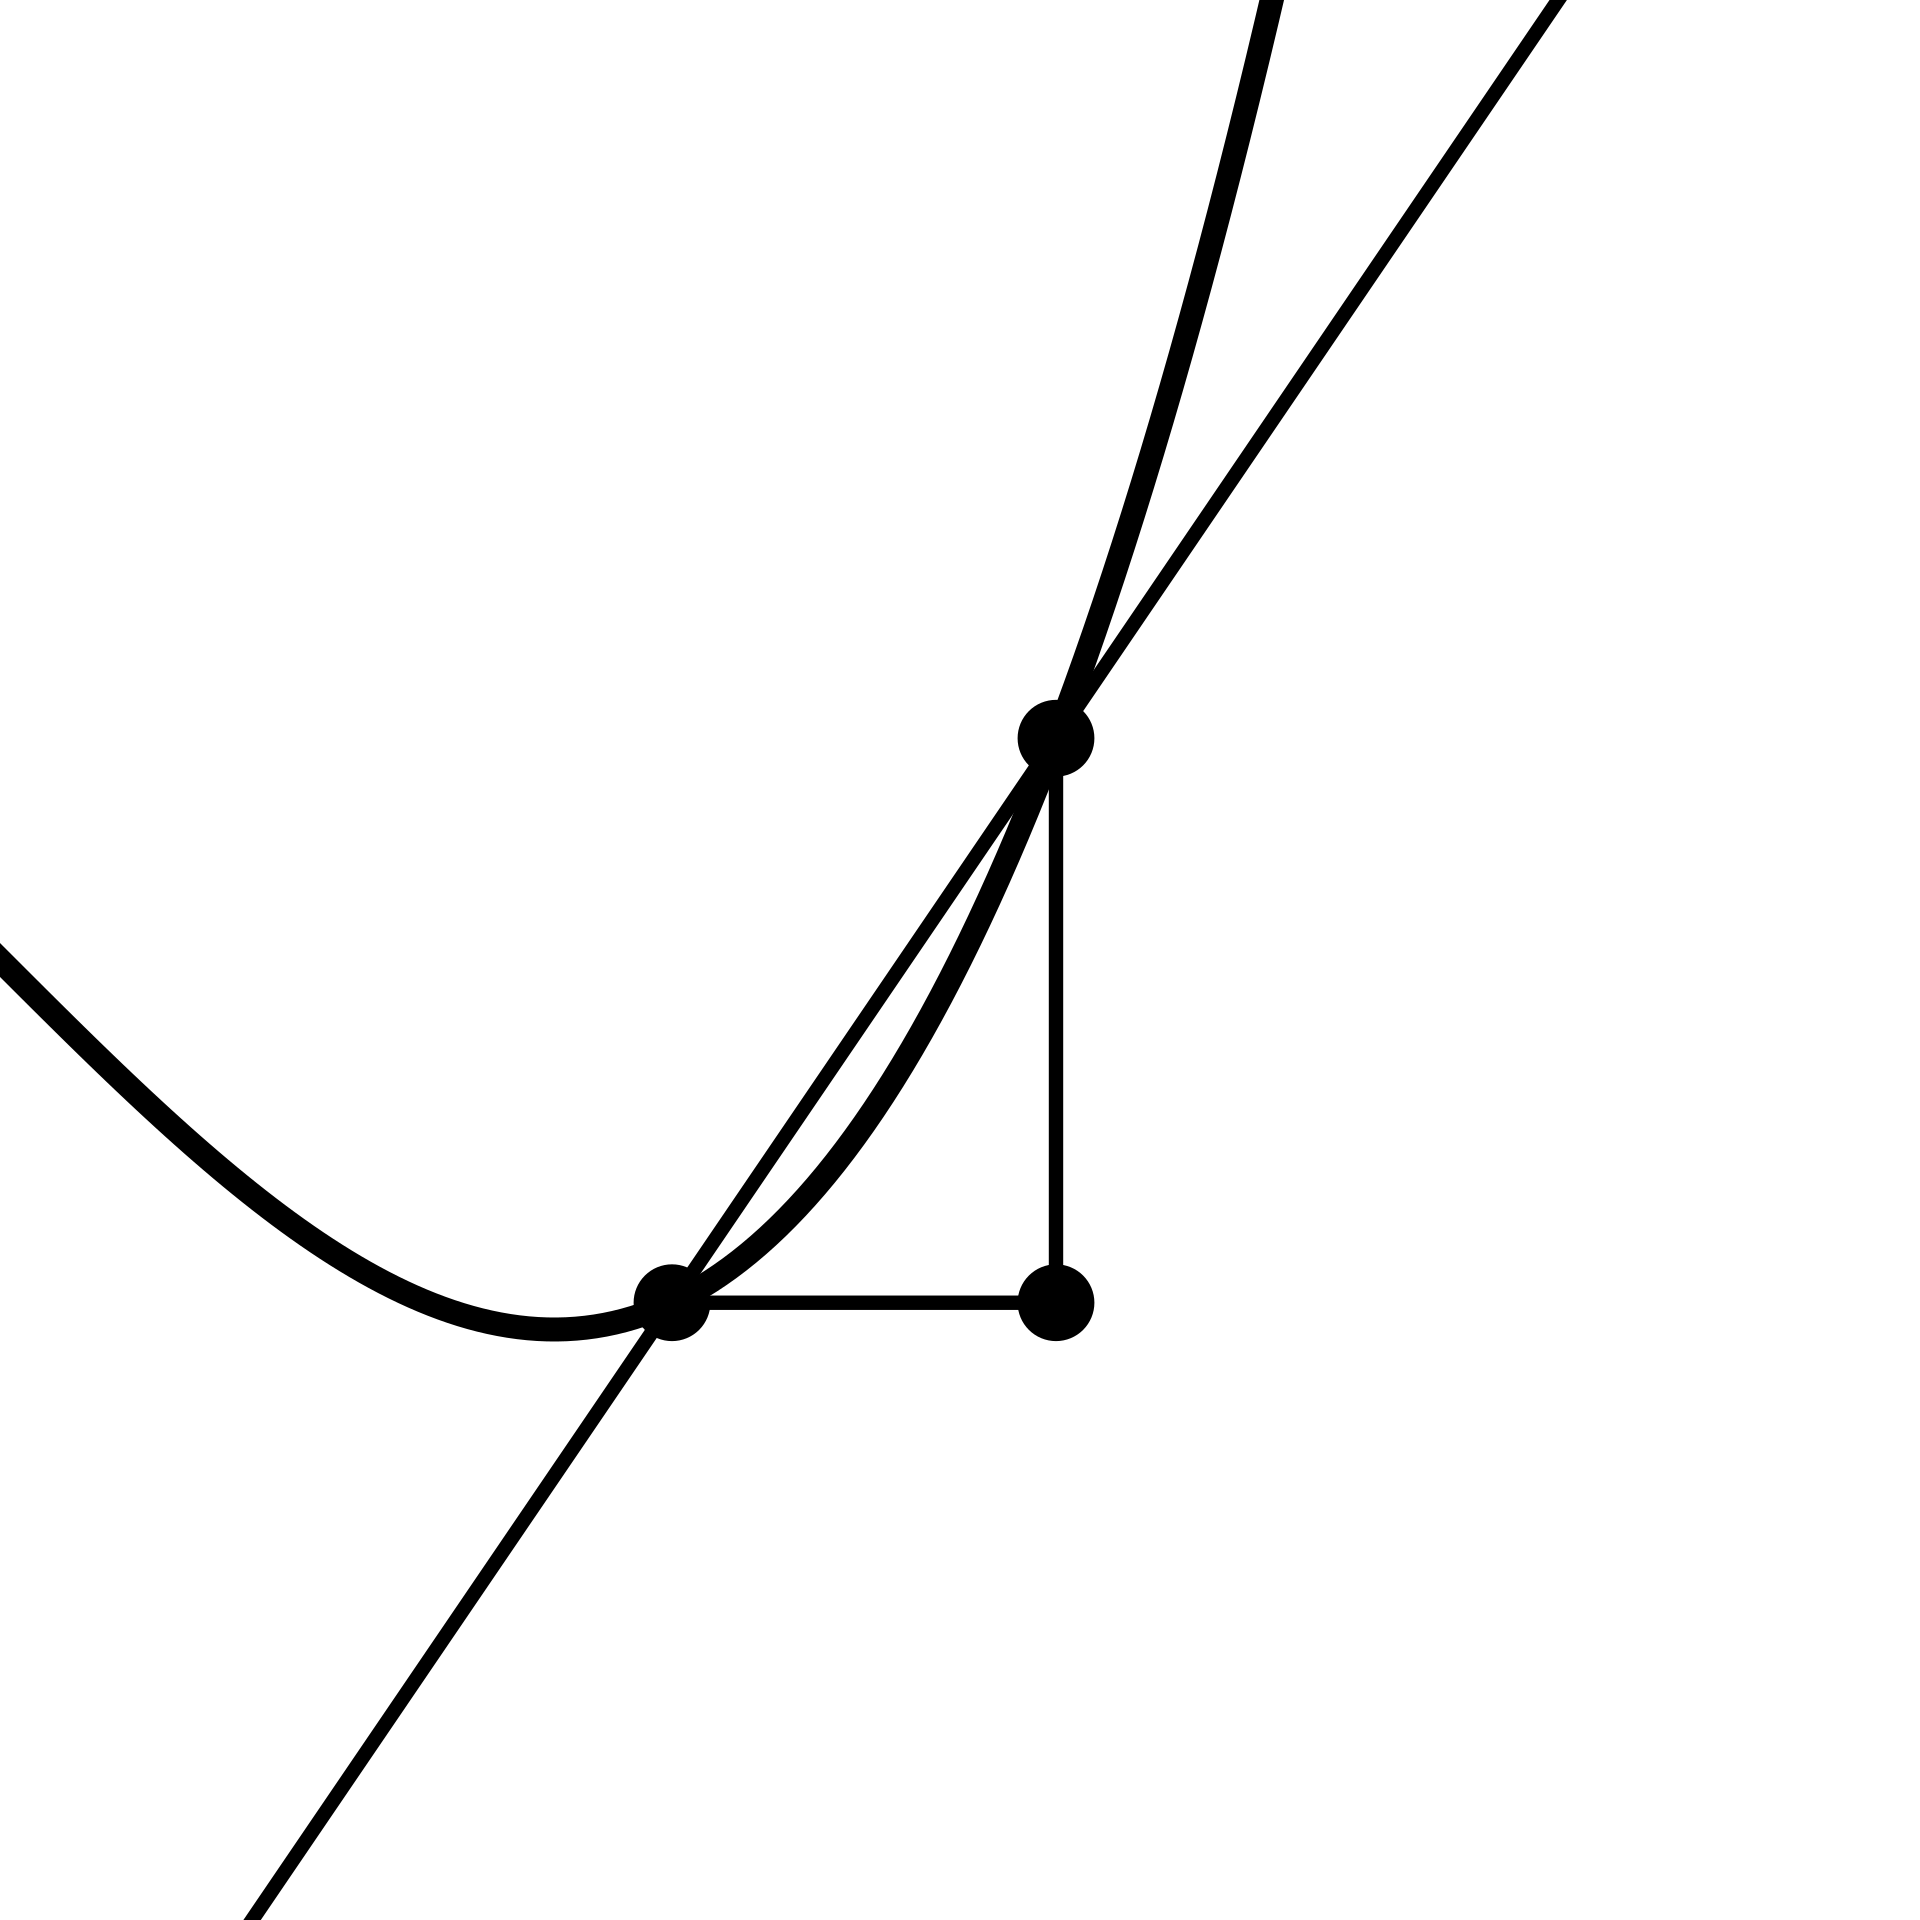

In [5]:
%%manim -v WARNING Secant

scale = 1
config.frame_width = scale * 2

x1 = .7
x2 = 1.1

slope = (poly(x2) - poly(x1)) / (x2 - x1)
b = poly(x1) - (slope * x1)

def linear_function(x):
    return (slope * x) + b

class Secant(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        line = FunctionGraph(
            poly,
            color=BLACK,
            x_range=(-scale * 2, scale * 2)  # Explicitly set the range
        )
        line.stroke_width = 2.5

        horizontal_line = Line(start=(x1, poly(x1), 0), end=(x2, poly(x1), 0), color=BLACK, stroke_width=1.5)
        vertical_line = Line(start=(x2, poly(x2), 0), end=(x2, poly(x1), 0), color=BLACK, stroke_width=1.5)

        dot1 = Dot((x1, poly(x1), 0), radius=0.04, color=BLACK)
        dot2 = Dot((x2, poly(x2), 0), radius=0.04, color=BLACK)
        dot3 = Dot((x2, poly(x1), 0), radius=0.04, color=BLACK)

        infinite_line = FunctionGraph(
            linear_function,
            color=BLACK,
            x_range=(-scale * 2, scale * 2)  # Explicitly set the range
        )
        infinite_line.stroke_width = 1.5

        # Group all elements and apply the offset
        all_elements = VGroup(
            line, vertical_line, horizontal_line,
            dot1, dot2, dot3, infinite_line
        )
        all_elements.shift(LEFT)  # Adjust the vector as needed

        self.add(all_elements)


Manim Community v0.19.0

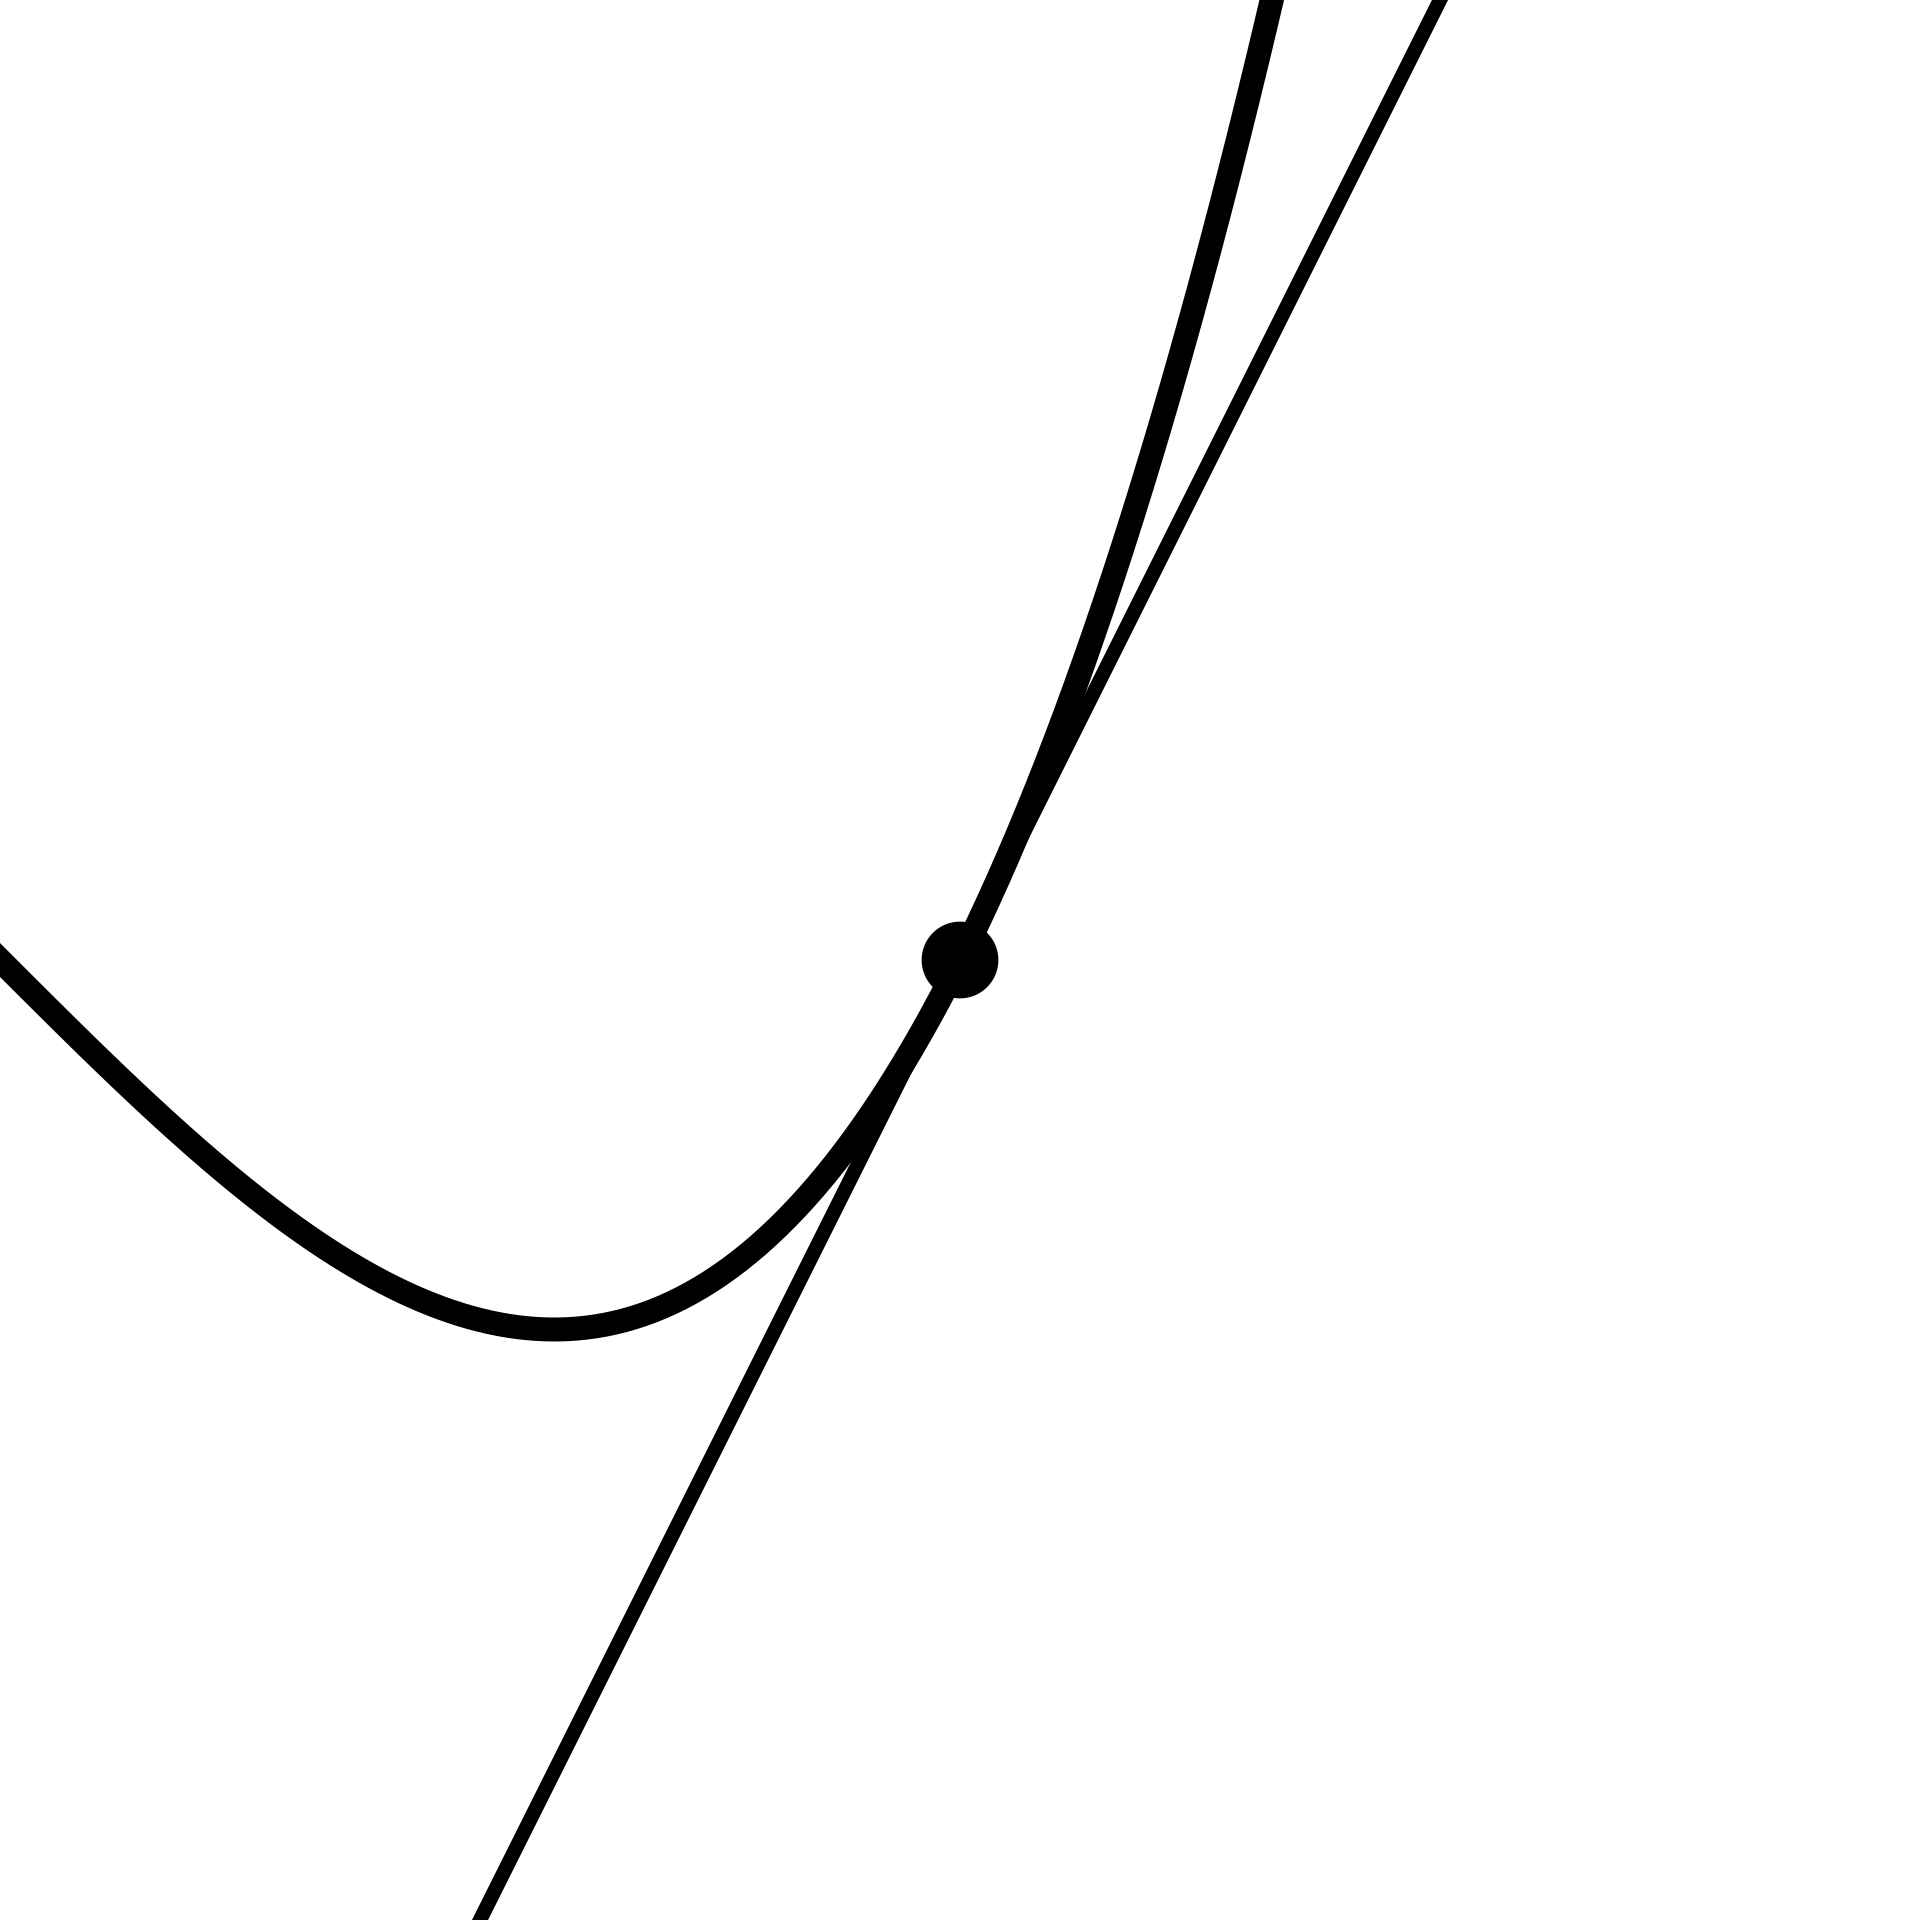

In [6]:
%%manim -v WARNING Tangent

scale = 1
config.frame_width = scale * 2

point = 1

def linear_function(x):
    slope = (3 * (point**2)) - 1
    b = poly(point) - (slope * point)
    return (slope * x) + b

class Tangent(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        line = FunctionGraph(
            poly,
            color=BLACK,
            x_range=(-scale * 2, scale * 2)  # Explicitly set the range
        )
        line.stroke_width = 2.5


        dot = Dot((point, poly(point), 0), radius=0.04, color=BLACK)

        infinite_line = FunctionGraph(
            linear_function,
            color=BLACK,
            x_range=(-scale * 2, scale * 2)  # Explicitly set the range
        )
        infinite_line.stroke_width = 1.5

        # Group all elements and apply the offset
        all_elements = VGroup(line, dot, infinite_line)
        all_elements.shift(LEFT)  # Adjust the vector as needed

        self.add(all_elements)


Manim Community v0.19.0

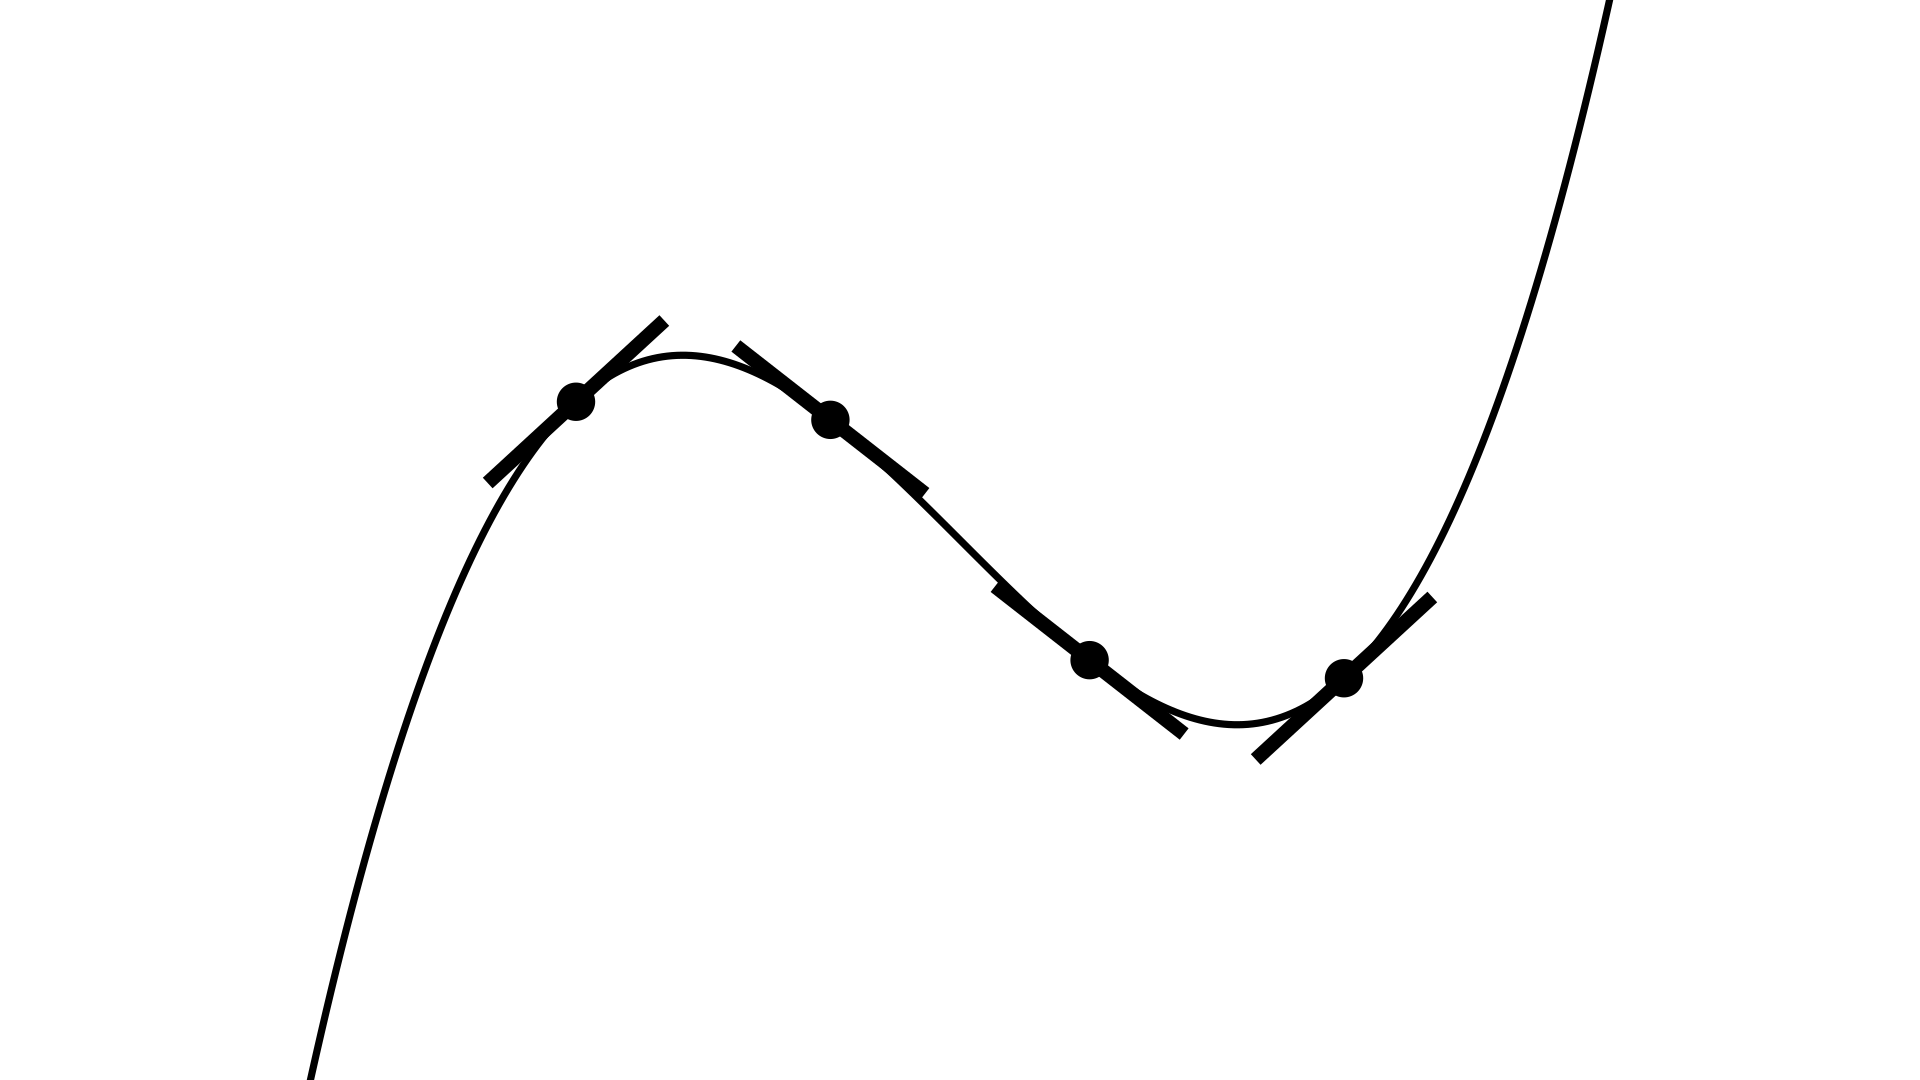

In [7]:
%%manim -v WARNING Tangents

scale = 2

config.frame_width = scale * 2
config.pixel_width = round(imgScale * 1920)
config.pixel_height = round(imgScale * 1080)

points = [-.8, -.27, .27, .8]

def create_linear_function(point):
    slope = (3 * (point**2)) - 1
    b = poly(point) - (slope * point)
    return lambda x: (slope * x) + b, slope

class Tangents(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        line = FunctionGraph(
            poly,
            color=BLACK,
            x_range=(-scale * 2, scale * 2)  # Explicitly set the range
        )
        line.stroke_width = 1.5
        
        self.add(line)
        
        tangent_length = 0.5
        for point in points:
    
            dot = Dot((point, poly(point), 0), radius=0.04, color=BLACK)
            linear_function, slope = create_linear_function(point)
            
            dx = tangent_length / (2 * (1 + slope**2)**0.5)

            tangent_line = FunctionGraph(
                linear_function,
                color=BLACK,
                x_range=(point - dx, point + dx) # Explicitly set the range
            )
            tangent_line.stroke_width = 3
            
            self.add(dot, tangent_line)


Manim Community v0.19.0

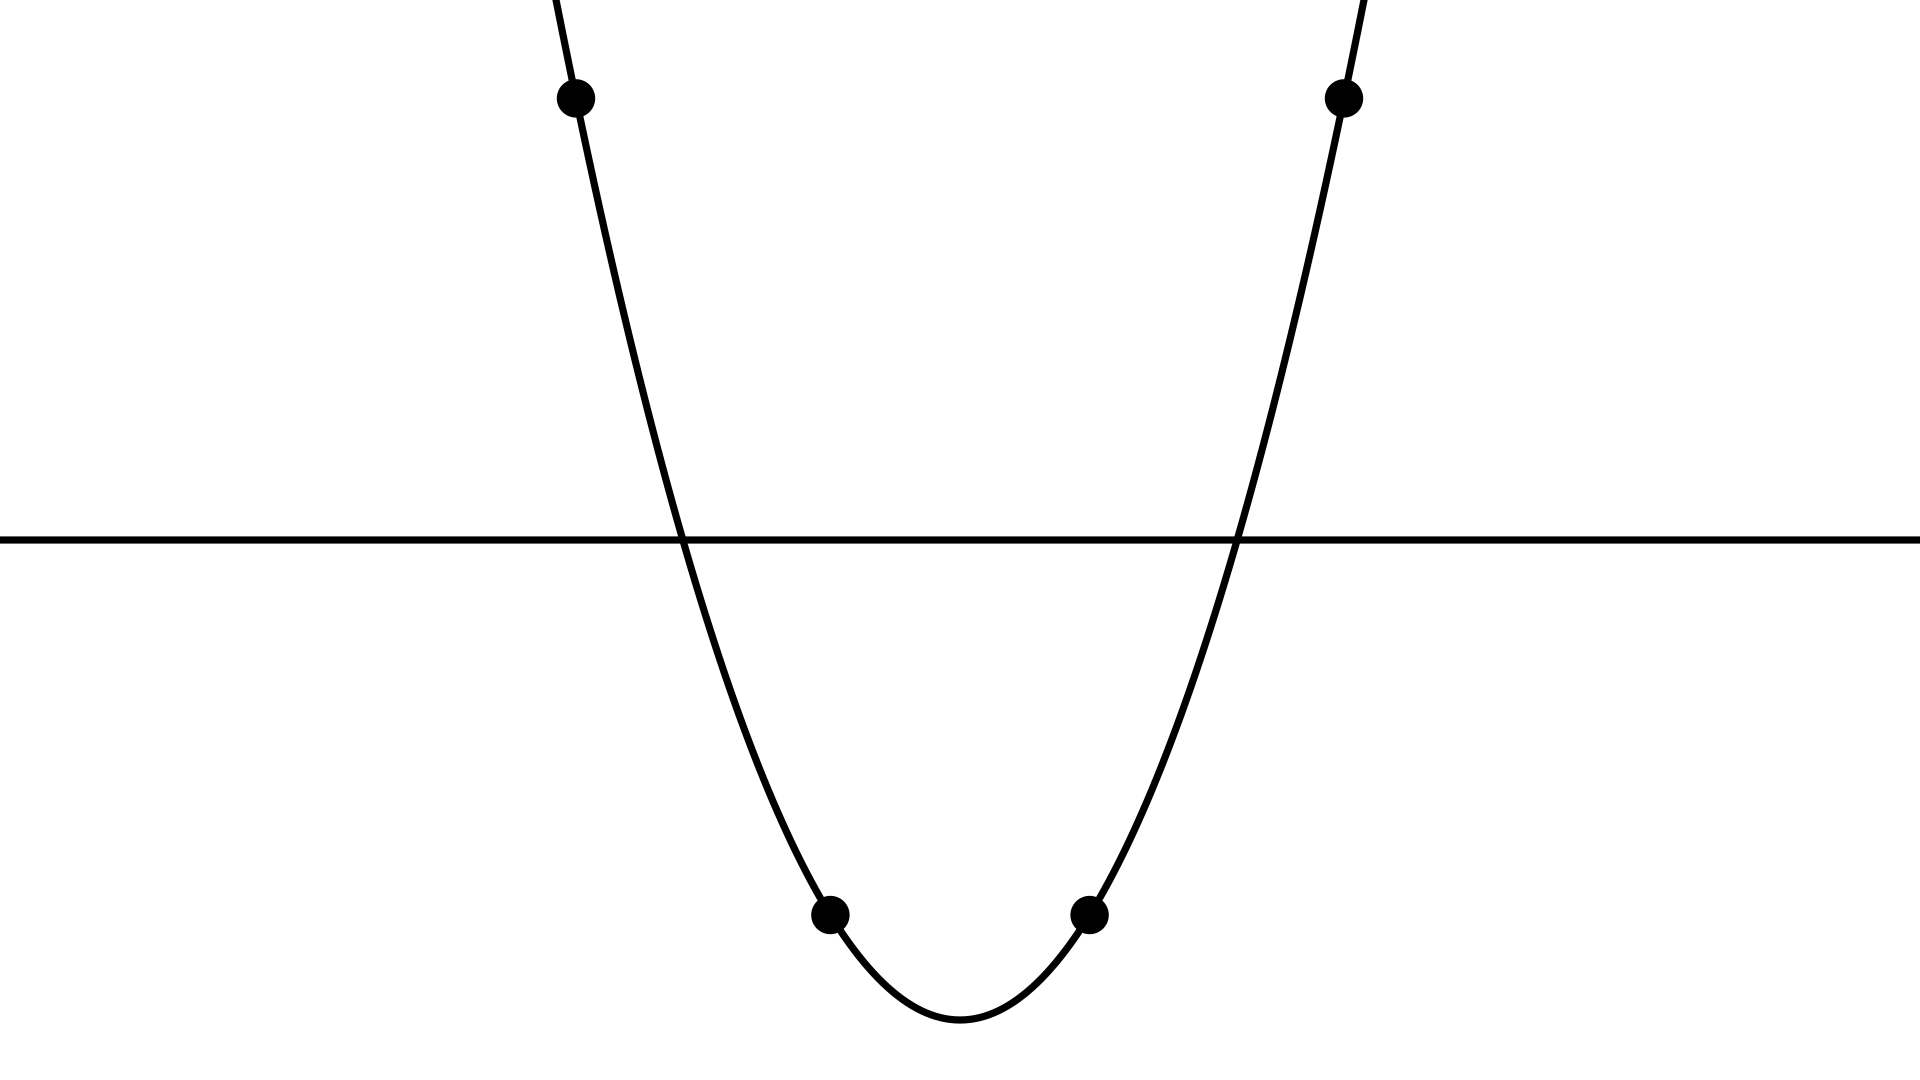

In [8]:
%%manim -v WARNING Derivative

points = [-.8, -.27, .27, .8]

def derivative(x):
    return (3 * (x**2)) - 1

class Derivative(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        line = FunctionGraph(
            derivative,
            color=BLACK,
            x_range=(-scale * 2, scale * 2)  # Explicitly set the range
        )
        line.stroke_width = 1.5
        
        zero = FunctionGraph(
            lambda x: 0,
            color=BLACK,
            x_range=(-scale * 2, scale * 2)  # Explicitly set the range
        )
        zero.stroke_width = 1.5
        
        self.add(line, zero)
        
        for point in points:
            y = derivative(point)
            dot = Dot((point, y, 0), radius=0.04, color=BLACK)
            
            self.add(dot)


Manim Community v0.19.0

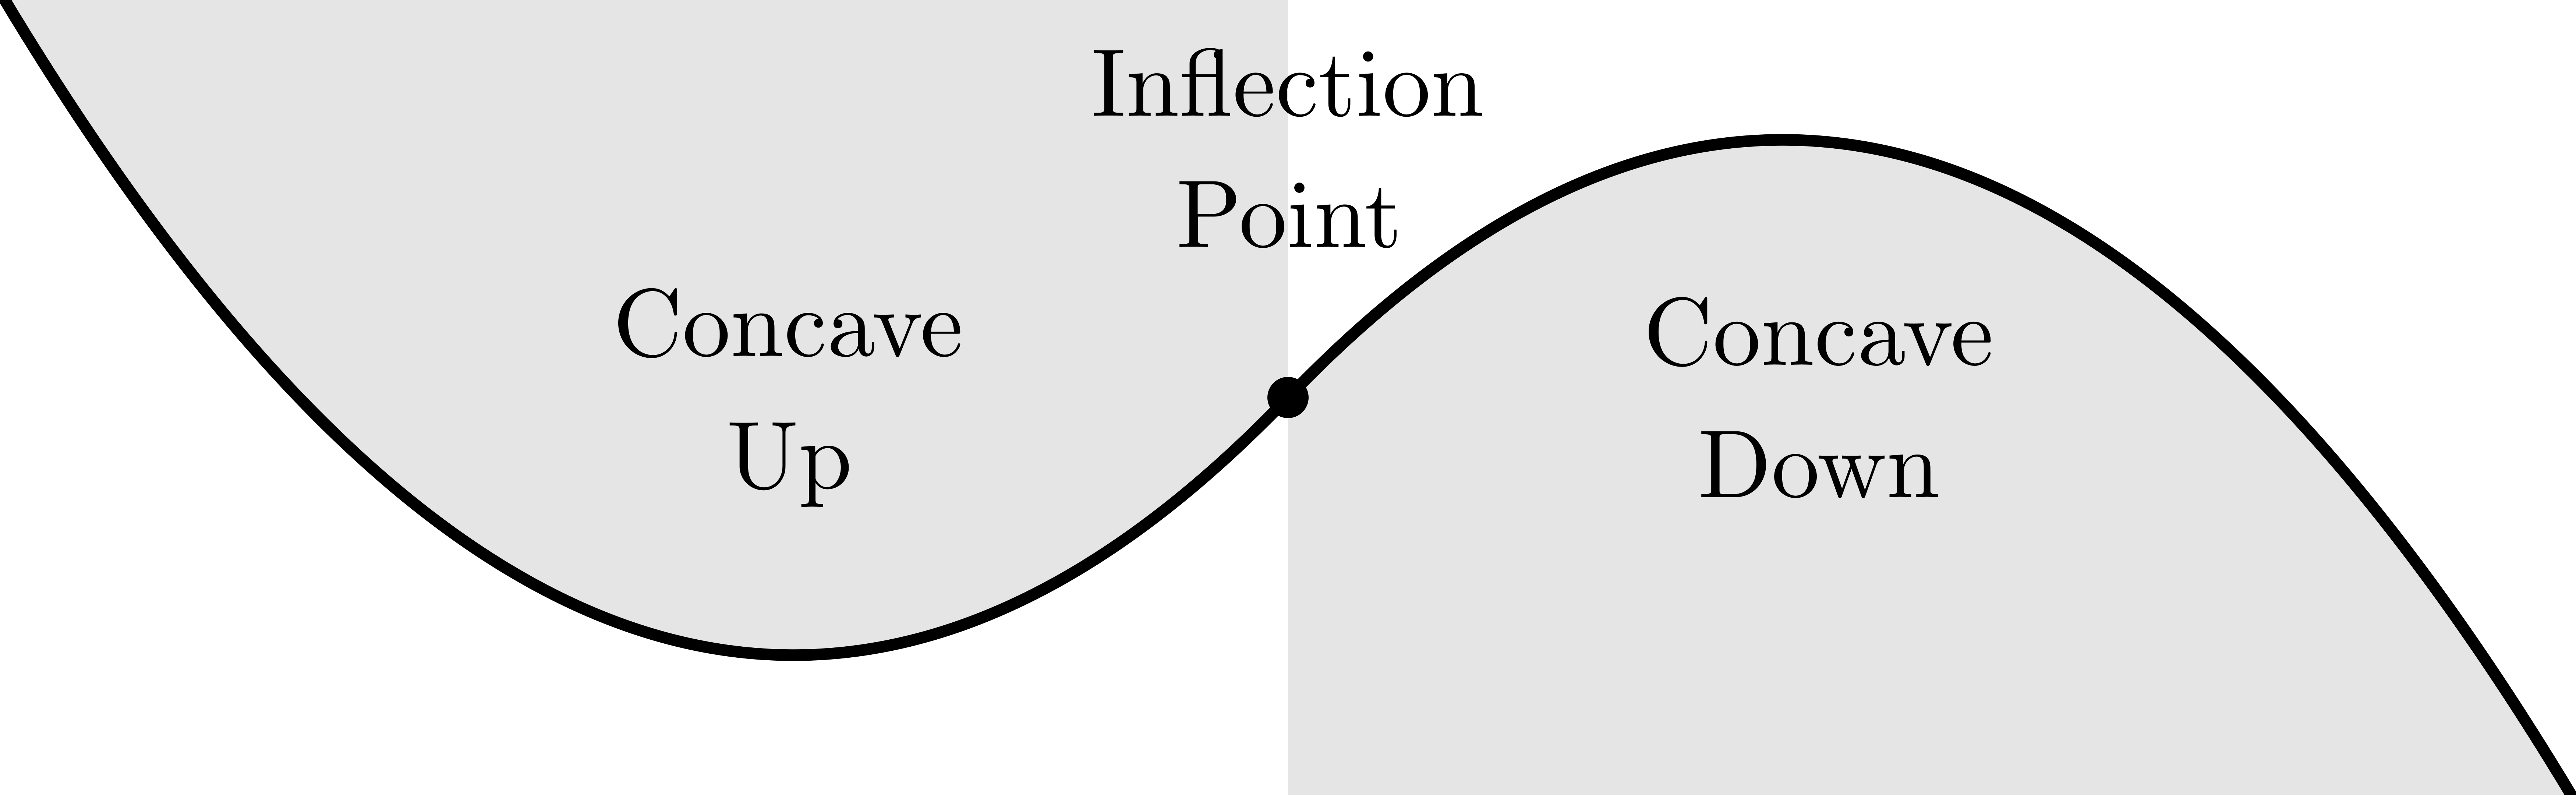

In [9]:
%%manim -v WARNING Concavity

scale = 5

config.frame_width = scale * 2
config.pixel_width = round(imgScale * 7000)
config.pixel_height = round(imgScale * 2160)

func_scale = 1.92

def concave_func(x):
    if (x < 0):
        return (((x / func_scale) + 1)**2) - 1
    else:
        return 1 - (((x / func_scale) - 1)**2)


class Concavity(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        curve = FunctionGraph(
            concave_func,
            color=BLACK,
            x_range=(-scale * 2, scale * 2)  # Explicitly set the range
        )
        curve.stroke_width = 4.5
        # Highlight space under the curve where x > 0
        area1 = Polygon(
            *[ (x, concave_func(x), 0) for x in np.linspace(0, scale * 2, 100)] + [(0, -2, 0), (0, -2, 0)],
            color="#ccc",
            fill_opacity=0.5,
            stroke_width=0
        )

        # Highlight space above the curve where x < 0
        area2 = Polygon(
            *[
            (x, concave_func(x), 0) for x in np.linspace(-scale * 2, 0, 100)
            ] + [(0, 1, 0), (0, 2, 0)],
            color="#ccc",
            fill_opacity=0.5,
            stroke_width=0
        )
        
        self.add(area1, area2, curve)
        
        
        dot = Dot((0, 0, 0), radius=0.08, color=BLACK)
        inflection_text = VGroup(
            MathTex(r"\text{Inflection}", color=BLACK, font_size=36),
            MathTex(r"\text{Point}", color=BLACK, font_size=36)
        ).arrange(DOWN).next_to(dot, UP * 2.5, buff=0.2)
        
        concave_down_text = VGroup(
            MathTex(r"\text{Concave}", color=BLACK, font_size=36),
            MathTex(r"\text{Down}", color=BLACK, font_size=36)
        ).arrange(DOWN, center=True).next_to((1.2, 0, 0), buff=0.2)
             
        concave_up_text = VGroup(
            MathTex(r"\text{Concave}", color=BLACK, font_size=36),
            MathTex(r"\text{Up}", color=BLACK, font_size=36)
        ).arrange(DOWN, center=True).next_to((-2.8, 0, 0), buff=0.2)
        
        self.add(dot, inflection_text, concave_up_text, concave_down_text)
        


Manim Community v0.19.0

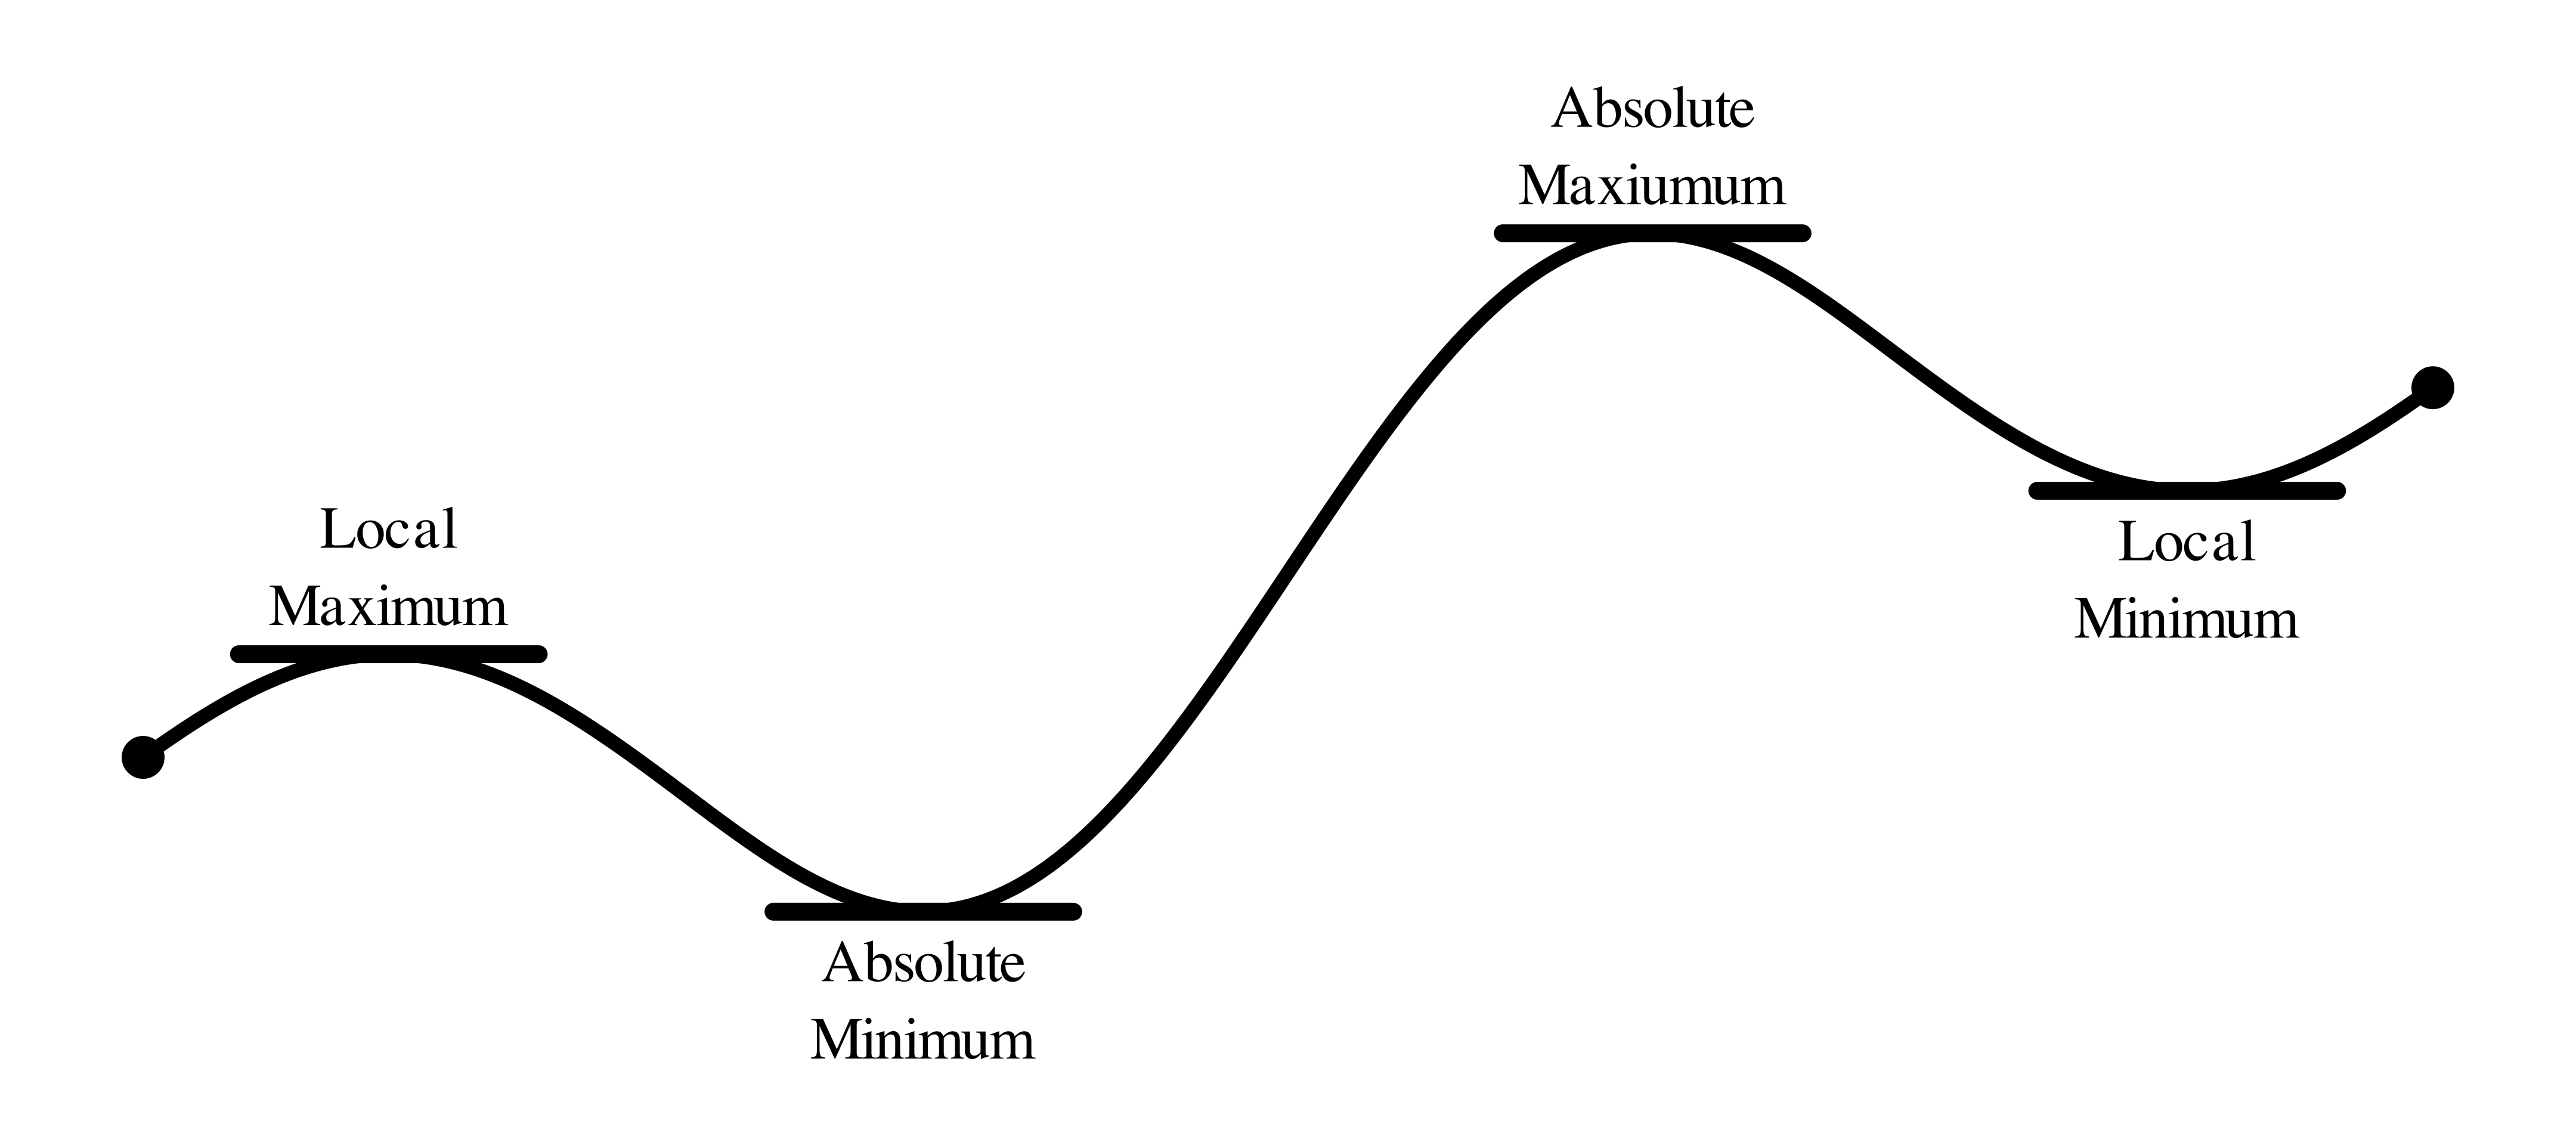

In [10]:
%%manim -v WARNING CriticalPoints

scale = 9

config.frame_width = scale * 2
config.pixel_width = round(imgScale * 4320)
config.pixel_height = round(imgScale * 1920)

rangeVal = 8

# Define functions
def a(x):
    if x <= -np.pi:
        return np.cos(x) - 1
    elif x <= 0:
        return 2 * np.cos(x)
    else:
        return np.cos(x) + 1

def b(x):
    return a(0.75 * x - np.pi/2)

def b_prime(x):
    # Approximating derivative of b using the difference quotient
    h = 1e-6
    return (b(x + h) - b(x)) / h

def c(x):
    if -4/3 * np.pi <= x <= 4/3 * np.pi:
        return 2.25/2 * np.sin(3/4 * x + np.pi/2) + 0.375
    elif -5.5 * np.pi/2 <= x <= 5.5 * np.pi/2:
        return b_prime(x)
    else:
        return 0

# Precompute values for d(x) using numerical integration
x_values = np.linspace(-rangeVal, rangeVal, 1000)
d_values = np.zeros_like(x_values)

        
# Reference point: d(4π/3) = π/2
ref_idx = np.argmin(np.abs(x_values - 4/3 * np.pi))

# Compute d values using trapezoidal rule
dx = x_values[1] - x_values[0]
for i in range(ref_idx, len(x_values)):
    if i == ref_idx:
        d_values[i] = np.pi/2
    else:
        c_avg = (c(x_values[i-1]) + c(x_values[i])) / 2
        d_values[i] = d_values[i-1] + c_avg * dx

for i in range(ref_idx-1, -1, -1):
    c_avg = (c(x_values[i]) + c(x_values[i+1])) / 2
    d_values[i] = d_values[i+1] - c_avg * dx
        

class CriticalPoints(Scene):
    def construct(self):
        
        d_func = lambda x: np.interp(x, x_values, d_values)
        
        d_graph = FunctionGraph(
            d_func,
            x_range=[-rangeVal, rangeVal],
            color=BLACK
        )
        d_graph.stroke_width = 10
        
        start_point = Dot((-rangeVal, d_func(-rangeVal), 0), radius=0.15, color=BLACK)
        end_point = Dot((rangeVal, d_func(rangeVal), 0), radius=0.15, color=BLACK)
        
        for [x, y, text] in [[2.548, 2.37, "Absolute Maxiumum"], [ -2.548, -2.37, "Absolute Minimum"], [6 * np.pi / 3, 0.571, "Local Minimum"], [-6 * np.pi / 3, -0.571, "Local Maximum"]]:
            line = Line(
                start=(x - np.pi / 3, y, 0),
                end=(x + np.pi / 3, y, 0),
                color=BLACK,
                stroke_width=12.5,
                cap_style=CapStyleType.ROUND
            )
            
            if "min" in text.lower():
                direction = DOWN
            else:
                direction = UP
            
            title = VGroup(
                Text(text.split()[0], font_size=30, color=BLACK),
                Text(text.split()[1], font_size=30, color=BLACK)
            ).arrange(DOWN, center=True).next_to(line, direction, buff=0.2)
            self.add(title, line)
        
        # Add everything to the scene
        self.add(d_graph, start_point, end_point)


Manim Community v0.19.0

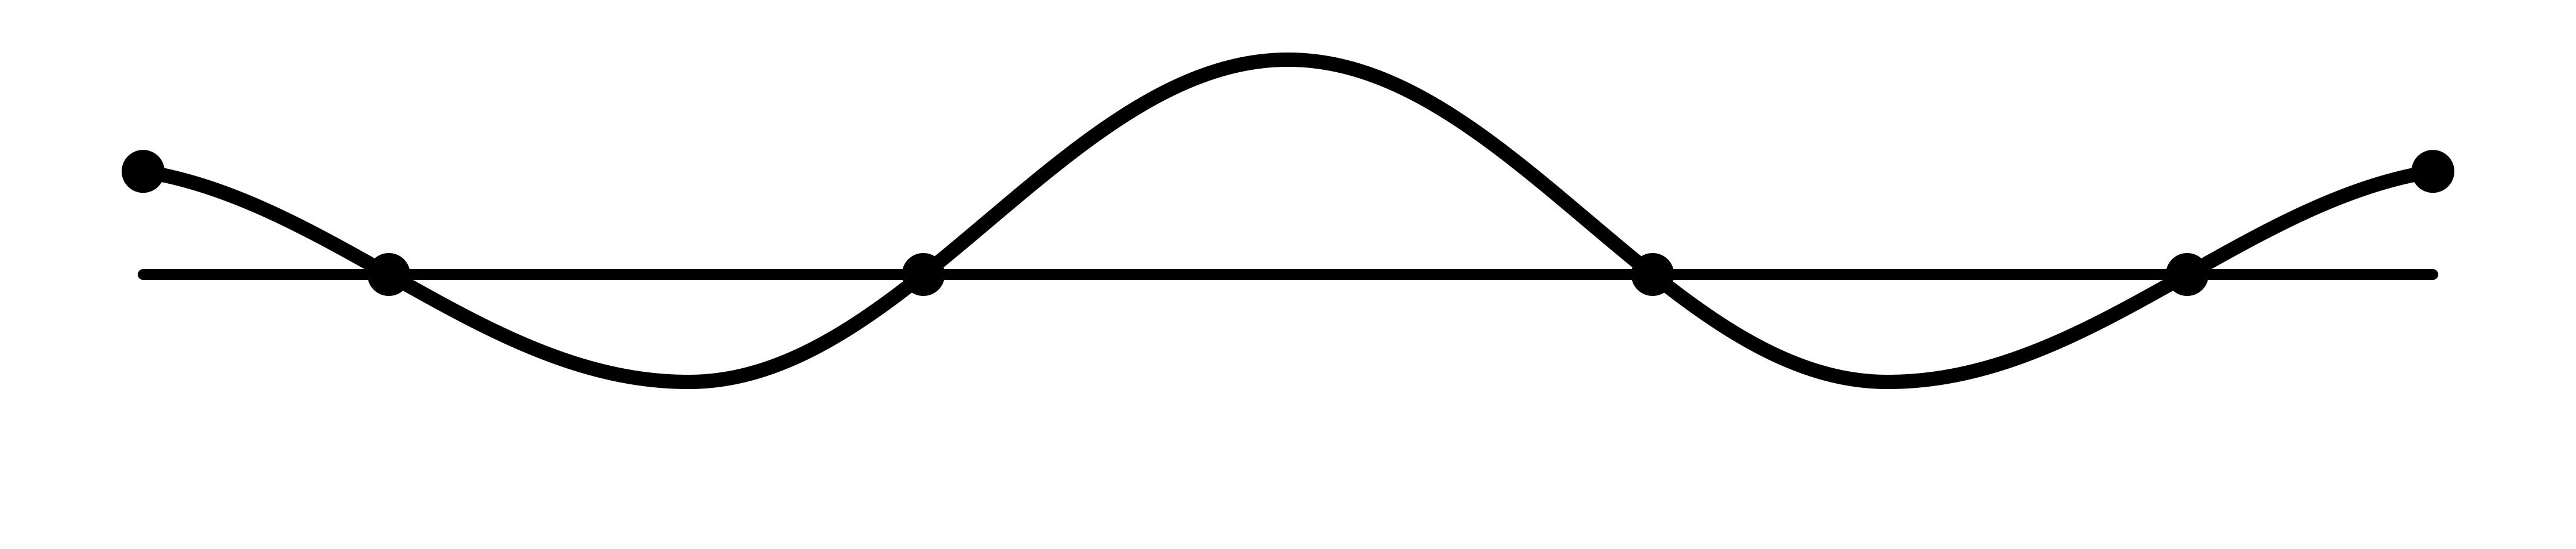

In [11]:
%%manim -v WARNING CriticalPointsDerivative

config.frame_width = scale * 2
config.pixel_width = round(imgScale * 4320)
config.pixel_height = round(imgScale * 920)

class CriticalPointsDerivative(Scene):
    def construct(self):
        c_graph = FunctionGraph(lambda x: c(x), x_range=[-rangeVal, rangeVal], color=BLACK)
        c_graph.stroke_width = 10
        
        for [x, y] in [[2 * np.pi, 0], [2.548, 0], [-2.548, 0], [-2 * np.pi, 0]]:
            dot = Dot((x, y, 0), radius=0.15, color=BLACK)
            self.add(dot)
            
        start_point = Dot((-rangeVal, c(-rangeVal), 0), radius=0.15, color=BLACK)
        end_point = Dot((rangeVal, c(rangeVal), 0), radius=0.15, color=BLACK)
       
        zero_line = Line(
            start=(-rangeVal, 0, 0),
            end=(rangeVal, 0, 0),
            color=BLACK,
            stroke_width=7.5,
            cap_style=CapStyleType.ROUND
        )
        
        # Add everything to the scene
        self.add(c_graph, start_point, end_point, zero_line)

Manim Community v0.19.0

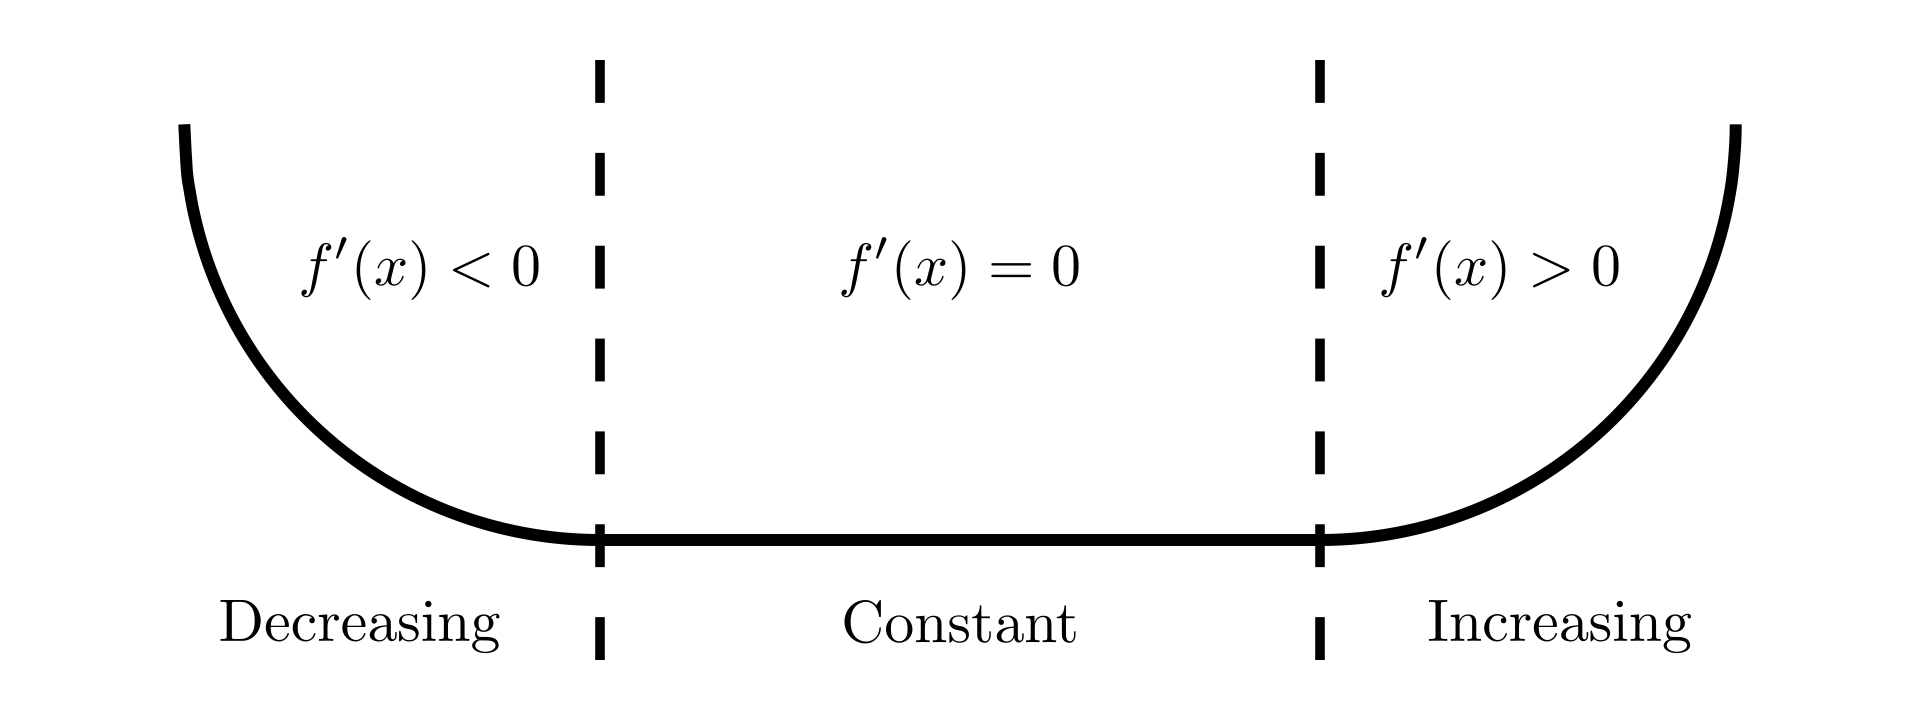

In [12]:
%%manim -v WARNING CriticalPointsDerivative

scale = 4

config.frame_width = scale * 2
config.pixel_width = round(imgScale * 1920)
config.pixel_height = round(imgScale * 720)

rangeVal = 4.5
vShift = .75

class CriticalPointsDerivative(Scene):
    def construct(self):
        
        left_end = -rangeVal + 3
        right_end = rangeVal - 3
        

        # Refined circular arc on the left side
        left_circular = FunctionGraph(
            lambda x: -sqrt(3 - ((x - left_end)**2)) + sqrt(3) - vShift,
            x_range=(left_end - sqrt(3), left_end),
            color=BLACK,
            stroke_width=5
        )

        # Refined circular arc on the right side
        right_circular = FunctionGraph(
            lambda x: -sqrt(3 - ((x - right_end)**2)) + sqrt(3) - vShift,
            x_range=(right_end, right_end + sqrt(3)),
            color=BLACK,
            stroke_width=5
        )

        # Line in the middle
        zero_line = Line(
            start=(-rangeVal + 3, -vShift, 0),
            end=(rangeVal - 3, -vShift, 0),
            color=BLACK,
            stroke_width=5
        )

        # Vertical dashed lines separating sections
        left_dashed_line = DashedLine(
            start=(left_end, -2 + vShift, 0),
            end=(left_end, .5 + vShift, 0),
            color=BLACK,
            dash_length=0.2
        )
        right_dashed_line = DashedLine(
            start=(right_end, -2 + vShift, 0),
            end=(right_end, .5 + vShift, 0),
            color=BLACK,
            dash_length=0.2
        )
        
        # Labels for each section
        negative_label = MathTex(r"f'(x) < 0", color=BLACK, font_size=24).next_to((-rangeVal +2.25, 0, 0), UP * .5, buff=0.5)
        zero_label = MathTex(r"f'(x) = 0", color=BLACK, font_size=24).next_to((0, 0, 0), UP  * .5, buff=0.5)
        positive_label = MathTex(r"f'(x) > 0", color=BLACK, font_size=24).next_to((rangeVal - 2.25, 0, 0), UP * .5, buff=0.5)
        
        
        negative_text = MathTex(r"\text{Decreasing}", color=BLACK, font_size=24).next_to((-rangeVal + 2, 0, 0), DOWN * 2, buff=0.5)
        zero_text = MathTex(r"\text{Constant}", color=BLACK, font_size=24).next_to((0, 0, 0), DOWN * 2, buff=0.5)
        positive_text = MathTex(r"\text{Increasing}", color=BLACK, font_size=24).next_to((rangeVal - 2, 0, 0), DOWN * 2, buff=0.5)

        # Add labels to the scene
        self.add(negative_label, zero_label, positive_label,
                 negative_text, zero_text, positive_text,
                 left_dashed_line, right_dashed_line,
                 left_circular, right_circular, zero_line)